# problem statement

This project aims to analyse the copper dataset and used for predicting the selling price of the copper. This problem statement comes under the category of Supervised machine learning algorithm.

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load the dataset
df = pd.read_csv("Copper_Set_dummy.csv")
df.head()

,id,item_date,quantity tons,customer,country,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,W,41.0,0.80,1210.0,104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [3]:
df.shape

(181673, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   item type      181673 non-null  object 
 6   application    181649 non-null  float64
 7   thickness      181672 non-null  float64
 8   width          181673 non-null  float64
 9   material_ref   103754 non-null  object 
 10  product_ref    181673 non-null  int64  
 11  delivery date  181672 non-null  float64
 12  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 18.0+ MB


# Data cleaning

In [5]:
df.drop("id",axis=1,inplace=True)

### item_date

In [6]:
df["item_date"].dtype

dtype('float64')

In [7]:
df['item_date'] = pd.to_datetime(df['item_date'], errors='coerce')

In [8]:
df["item_date"].isnull().sum()

1

In [9]:
df.dropna(subset=['item_date'], inplace=True)

### quantity tons

In [10]:
df["quantity tons"].dtype

dtype('O')

In [11]:
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
#Any values that can't be converted to numeric will be replaced with NaN. This is useful when dealing with columns that have a mix of numeric and non-numeric values

In [12]:
q3 = df["quantity tons"].quantile(0.75)
q1 = df["quantity tons"].quantile(0.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr) 
lower_threshold = q1 - (1.5 * iqr)

upper_threshold, lower_threshold

(151.44676636999998, -73.31570399)

In [13]:
df["quantity tons"].describe()

count    1.816710e+05
mean     5.874958e+03
std      2.349088e+06
min     -2.000000e+03
25%      1.097022e+01
50%      3.036428e+01
75%      6.716084e+01
max      1.000000e+09
Name: quantity tons, dtype: float64

In [14]:
df["quantity tons"] = df["quantity tons"].clip(lower_threshold, upper_threshold)

In [15]:
df["quantity tons"].describe()

count    181671.000000
mean         49.174875
std          47.994347
min         -73.315704
25%          10.970222
50%          30.364282
75%          67.160840
max         151.446766
Name: quantity tons, dtype: float64

In [16]:
a = df['quantity tons'] <= 0
print(a.sum())
df.loc[a, 'quantity tons'] = np.nan

4


In [17]:
df["quantity tons"].isnull().sum()

5

In [18]:
df.dropna(subset=['quantity tons'], inplace=True)

### customer

In [19]:
df["customer"].dtype

dtype('float64')

In [20]:
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')

In [21]:
df["customer"].isnull().sum()

1

In [22]:
df.dropna(subset=['customer'], inplace=True)

In [23]:
df['customer'] = df['customer'].astype(int)

### country

In [24]:
df["country"].dtype

dtype('float64')

In [25]:
df['country'] = pd.to_numeric(df['country'], errors='coerce')

In [26]:
df["country"].isnull().sum()

28

In [27]:
df.dropna(subset=['country'], inplace=True)

In [28]:
df['country'] = df['country'].astype(int)

### item type

In [31]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'item type' column
df["item type"] = label_encoder.fit_transform(df["item type"])

In [32]:
df.head()

,item_date,quantity tons,customer,country,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,1970-01-01 00:00:00.020210401,54.151139,30156308,28,5,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,1970-01-01 00:00:00.020210401,151.446766,30202938,25,5,41.0,0.80,1210.0,104991,1668701718,20210401.0,1047.00
2,1970-01-01 00:00:00.020210401,151.446766,30153963,30,6,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,1970-01-01 00:00:00.020210401,151.446766,30349574,32,3,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,1970-01-01 00:00:00.020210401,151.446766,30211560,28,5,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


### application

In [34]:
df["application"].dtype

dtype('float64')

In [35]:
df['application'] = pd.to_numeric(df['application'], errors='coerce')

In [36]:
df['application'].isnull().sum()

0

In [37]:
df.dropna(subset=['application'], inplace=True)

In [38]:
q3 = df["application"].quantile(0.75)
q1 = df["application"].quantile(0.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr) 
lower_threshold = q1 - (1.5 * iqr)

upper_threshold, lower_threshold

(87.5, -36.5)

In [39]:
df['application'].describe()

count    181638.000000
mean         25.615774
std          17.754186
min           2.000000
25%          10.000000
50%          15.000000
75%          41.000000
max          99.000000
Name: application, dtype: float64

In [40]:
df['application'] = df['application'].clip(lower_threshold, upper_threshold)

### thickness

In [41]:
df["thickness"].dtype

dtype('float64')

In [42]:
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')

In [43]:
df['thickness'].isnull().sum()

1

In [44]:
df.dropna(subset=['thickness'], inplace=True)

In [45]:
q3 = df["thickness"].quantile(0.75)
q1 = df["thickness"].quantile(0.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr) 
lower_threshold = q1 - (1.5 * iqr)

upper_threshold, lower_threshold

(6.449999999999999, -2.75)

In [46]:
df['thickness'].describe()

count    181637.000000
mean          2.564161
std           6.572534
min           0.180000
25%           0.700000
50%           1.500000
75%           3.000000
max        2500.000000
Name: thickness, dtype: float64

In [47]:
df['thickness'] = df['thickness'].clip(lower_threshold, upper_threshold)

### width

In [48]:
df["width"].dtype

dtype('float64')

In [49]:
df['width'] = pd.to_numeric(df['width'], errors='coerce')

In [50]:
df['width'].isnull().sum()

0

In [51]:
q3 = df["width"].quantile(0.75)
q1 = df["width"].quantile(0.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr) 
lower_threshold = q1 - (1.5 * iqr)

upper_threshold, lower_threshold

(1981.5, 697.5)

In [52]:
df['width'].describe()

count    181637.000000
mean       1295.259947
std         261.644668
min           1.000000
25%        1179.000000
50%        1250.000000
75%        1500.000000
max        2990.000000
Name: width, dtype: float64

In [53]:
df['width'] = df['width'].clip(lower_threshold, upper_threshold)

### material_ref

In [54]:
df['material_ref'].dtype

dtype('O')

In [55]:
df['material_ref'] = df['material_ref'].apply(lambda x: np.nan if str(x).startswith('00000') else x)
df['material_ref'].fillna('unknown', inplace=True)
df.dropna(subset=['material_ref'], inplace=True)

In [56]:
df['material_ref'].isnull().sum()

0

### product_ref

In [57]:
df['product_ref'].dtype

dtype('int64')

In [58]:
df['product_ref'].isnull().sum()

0

In [59]:
q3 = df["product_ref"].quantile(0.75)
q1 = df["product_ref"].quantile(0.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr) 
lower_threshold = q1 - (1.5 * iqr)

upper_threshold, lower_threshold

(3329274853.0, -1996585723.0)

In [60]:
df['product_ref'].describe()

count    1.816370e+05
mean     4.740251e+08
std      7.175390e+08
min      6.117280e+05
25%      6.119930e+05
50%      6.406650e+05
75%      1.332077e+09
max      1.722208e+09
Name: product_ref, dtype: float64

In [61]:
df['product_ref'] = df['product_ref'].clip(lower_threshold, upper_threshold)

### delivery date

In [62]:
df['delivery date'].dtype

dtype('float64')

In [63]:
df['delivery date'] = pd.to_datetime(df['delivery date'], errors='coerce')

In [64]:
df['delivery date'].isnull().sum()

1

In [65]:
df.dropna(subset=['delivery date'], inplace=True)

### selling_price

In [66]:
df['selling_price'].dtype

dtype('float64')

In [67]:
a = df['selling_price'] <= 0
print(a.sum())
df.loc[a, 'selling_price'] = np.nan

7


In [68]:
df['selling_price'].isnull().sum()

8

In [69]:
df.dropna(subset=['selling_price'], inplace=True)

# EDA

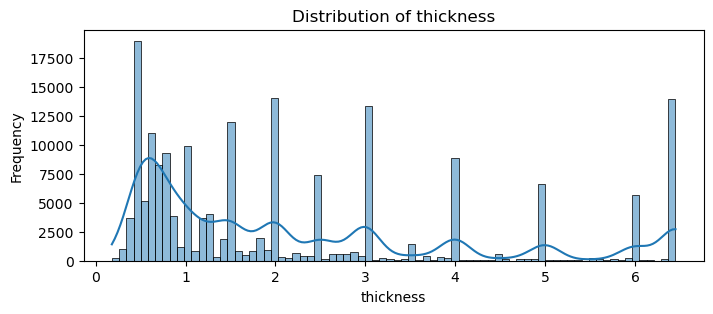

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'selling_price' is the column of interest

plt.figure(figsize=(8, 3))
sns.histplot(df['thickness'], kde=True)
plt.title('Distribution of thickness')
plt.xlabel('thickness')
plt.ylabel('Frequency')
plt.show()

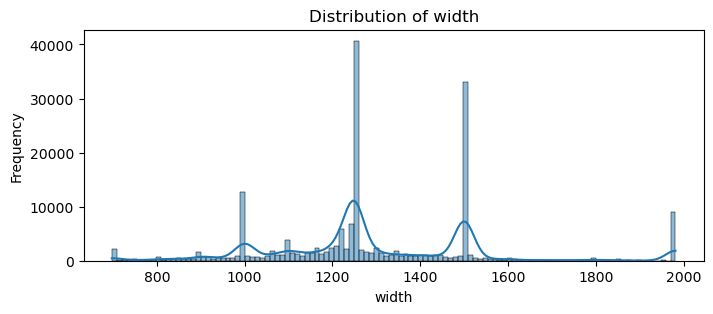

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'selling_price' is the column of interest

plt.figure(figsize=(8, 3))
sns.histplot(df['width'], kde=True)
plt.title('Distribution of width')
plt.xlabel('width')
plt.ylabel('Frequency')
plt.show()

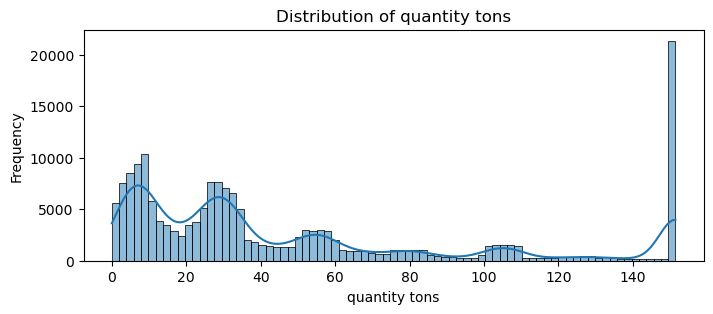

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'selling_price' is the column of interest

plt.figure(figsize=(8, 3))
sns.histplot(df['quantity tons'], kde=True)
plt.title('Distribution of quantity tons')
plt.xlabel('quantity tons')
plt.ylabel('Frequency')
plt.show()

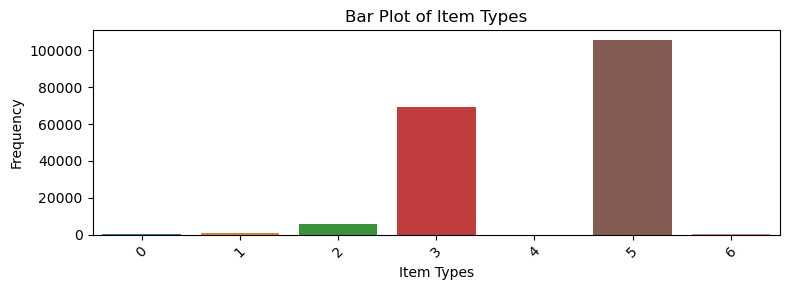

In [14]:
plt.figure(figsize=(8, 3))
sns.countplot(data=df, x='item type')
plt.xlabel('Item Types')
plt.ylabel('Frequency')
plt.title('Bar Plot of Item Types')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

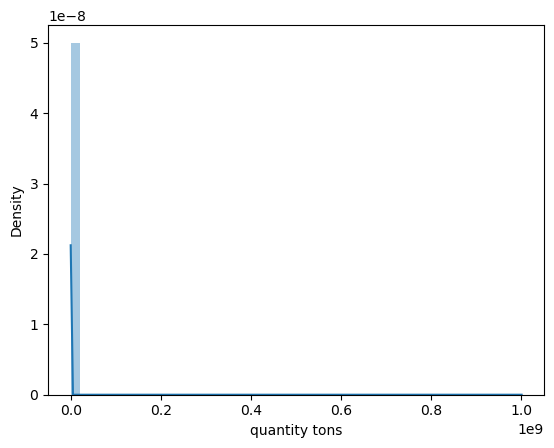

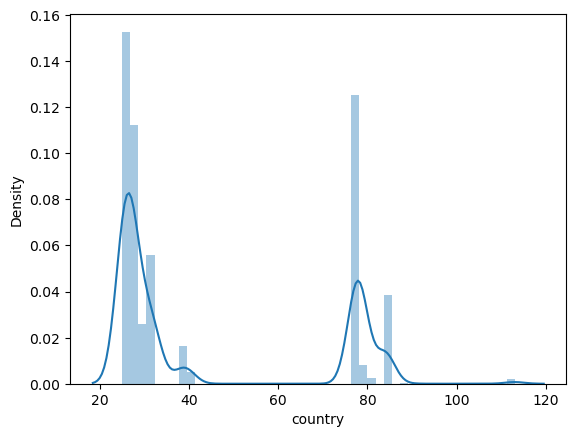

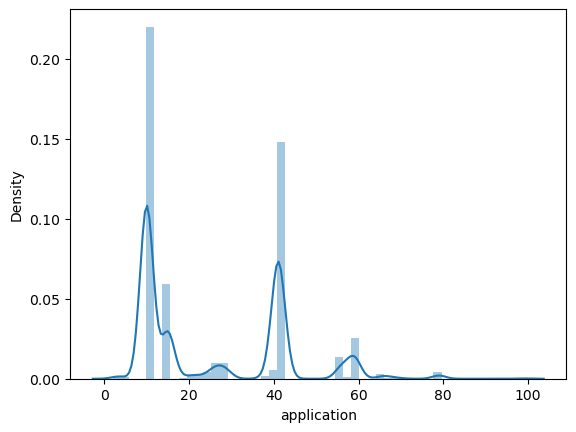

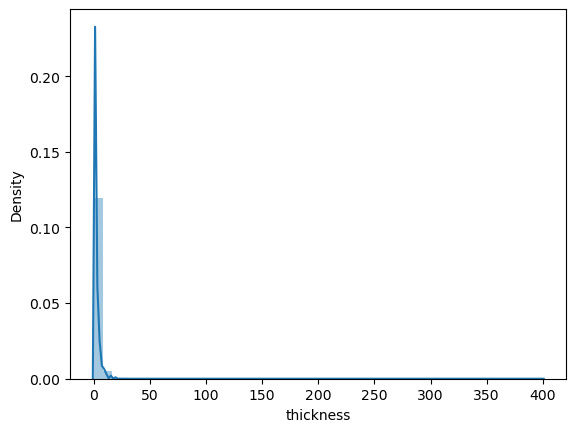

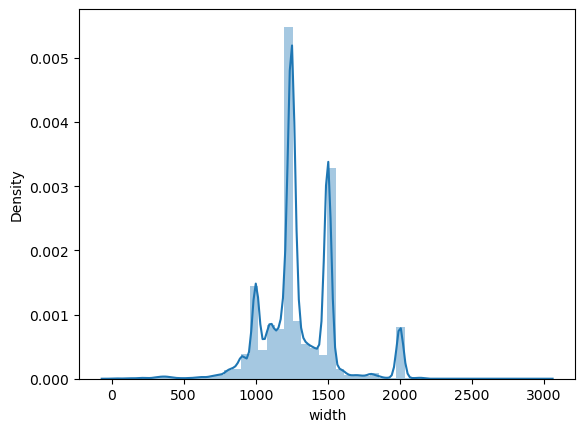

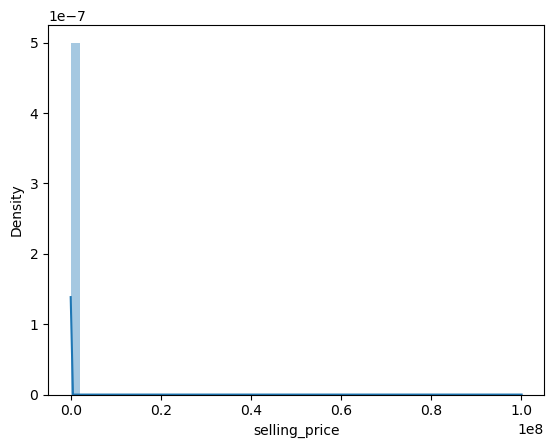

In [26]:
sns.distplot(df['quantity tons'])
plt.show()
sns.distplot(df['country'])
plt.show()
sns.distplot(df['application'])
plt.show()
sns.distplot(df['thickness'])
plt.show()
sns.distplot(df['width'])
plt.show()
sns.distplot(df['selling_price'])
plt.show()

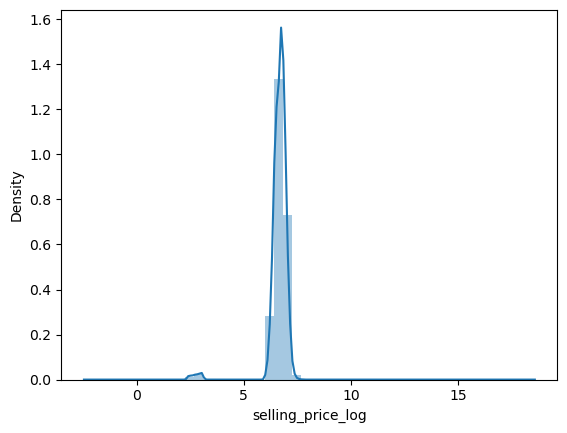

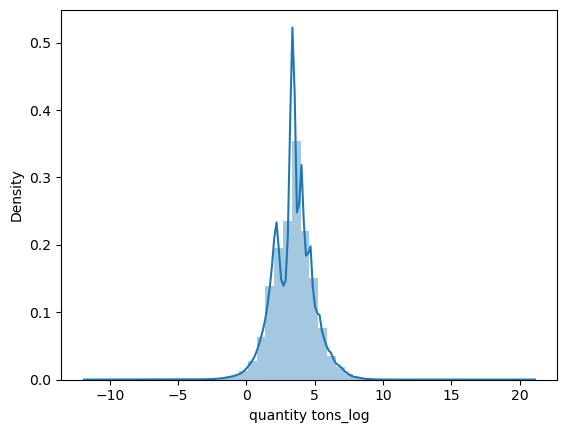

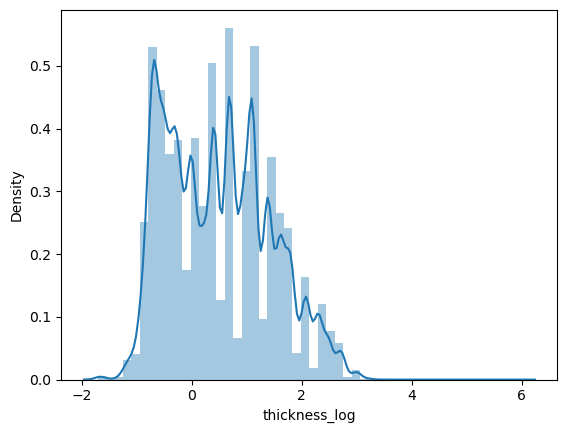

In [27]:
#Applying log ransformations for treating the skewness
df['selling_price_log'] = np.log(df['selling_price'])
sns.distplot(df['selling_price_log'])
plt.show()

df['quantity tons_log'] = np.log(df['quantity tons'])
sns.distplot(df['quantity tons_log'])
plt.show()

df['thickness_log'] = np.log(df['thickness'])
sns.distplot(df['thickness_log'])
plt.show()

In [71]:
df.drop(columns=["selling_price","quantity tons","thickness"],inplace=True)

In [75]:
X=df[['quantity tons_log','item type','application','thickness_log','width','country','customer','product_ref','selling_price_log']]

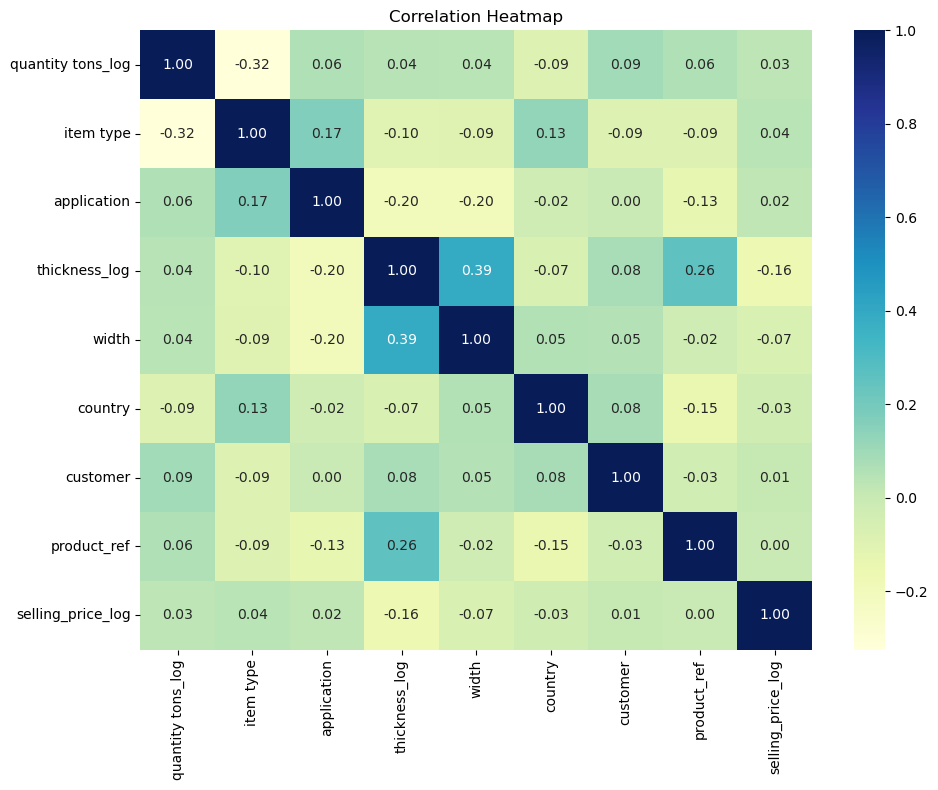

In [77]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# Model building

In [114]:
#split data into X, y
X = df[['quantity tons_log','item type','application','thickness_log','width','country','customer','product_ref']]
y = df['selling_price_log']

In [115]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS.fit_transform(X)
SS.fit_transform(y)

array([[ 0.41506739,  0.70620108,  0.82144631, ..., -0.69225033,
        -0.75771563,  1.66790511],
       [ 2.25042993,  0.70620108,  0.82144631, ..., -0.81517858,
        -0.29403459,  1.66498251],
       [ 1.77453529,  0.70620108,  1.76911846, ..., -0.61029817,
        -0.78103392, -0.65974878],
       ...,
       [ 1.34669579,  0.70620108,  0.82144631, ..., -0.81517858,
        -0.31475754, -0.43186654],
       [-1.34846834,  0.70620108,  0.82144631, ..., -0.81517858,
        -0.31475754, -0.43186654],
       [ 1.81043496,  0.70620108,  0.82144631, ..., -0.81517858,
        -0.31475754, -0.43186654]])

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [117]:
#import regression algorithm.

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Linear regression

In [118]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.08309562382488433
0.08524293562328744


# Random Forest

In [119]:
rf = RandomForestRegressor(n_estimators = 20, max_depth = 4, random_state = 0)
rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)
print(rf.score(X_train, y_train))
print(rf.score(X_test,y_test))

0.8752301632106526
0.8834505281409034


# Decision Tree

In [120]:
dtr = DecisionTreeRegressor()
# hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(best_model.score(X_train,y_train))
print(best_model.score(X_test,y_test))

Best hyperparameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10}
0.9497069796951494
0.9180435098419467


# KNN

In [121]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(knn.score(X_train, y_train))
print(knn.score(X_test,y_test))

0.7815484536860816
0.6434637782975046


# xgboosting

In [122]:
from xgboost import XGBRegressor
xgb_regressor = XGBRegressor()
xgb_regressor.fit(X_train, y_train)
y_pred = xgb_regressor.predict(X_test)
print(xgb_regressor.score(X_train, y_train))
print(xgb_regressor.score(X_test,y_test))

0.9262273056159964
0.9228183130408487


Comparing all the above models,we can conclude that xgboosting is performing very well in both training and testing.

# Evaluation metrics

In [126]:
from sklearn import metrics
print(metrics.r2_score(y_test,y_pred))

0.9228183130408487


In [91]:
#check MSE
metrics.mean_squared_error(y_test,y_pred)

0.026406561600065846

In [92]:
#check RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.16250095876660497

In [93]:
#check MAE
metrics.mean_absolute_error(y_test, y_pred)

0.11829951397189581

### saving the model

In [94]:
import pickle

In [95]:
pickle.dump(xgb_regressor, open('model.pkl','wb'))

### conclusion 

Developed a machine learning-based web application that that copper buyers and sellers can easily predict the price of copper.